In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [2]:
base_path = "D:\group_proj\cropped\cropped"

dir = os.listdir(base_path)
print(dir)

['C1', 'C2', 'C3']


In [3]:
img = []
path = []

for dirname, _, file_name in os.walk(base_path):
    for file in file_name:
        image = os.path.join(dirname, file)
        path.append(image)


In [4]:
len(path)

376

In [5]:
label = []
for i in range(len(path)):
    label.append(path[i].split("\\")[-2])
print(label)

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2

In [6]:
import pandas as pd
df = pd.DataFrame({'path': path, 'label': label})
df.head()

,path,label
0,D:\group_proj\cropped\cropped\C1\01_L.png,C1
1,D:\group_proj\cropped\cropped\C1\01_R.png,C1
2,D:\group_proj\cropped\cropped\C1\02_L.png,C1
3,D:\group_proj\cropped\cropped\C1\02_R.png,C1
4,D:\group_proj\cropped\cropped\C1\03_L.png,C1


In [7]:
# suffle the dataframe

df = df.sample(frac=1).reset_index(drop=True)
df.head()

,path,label
0,D:\group_proj\cropped\cropped\C3\48_R.png,C3
1,D:\group_proj\cropped\cropped\C2\52_R.png,C2
2,D:\group_proj\cropped\cropped\C1\18_L.png,C1
3,D:\group_proj\cropped\cropped\C3\40_R.png,C3
4,D:\group_proj\cropped\cropped\C2\38_L.png,C2


In [8]:
# replace the C3 and C2 with disease and C1 as normal

df['label'] = df['label'].replace(['C3', 'C2'], 'disease')

In [9]:
df['label'] = df['label'].replace(['C1'], 'normal')
df.tail()

,path,label
371,D:\group_proj\cropped\cropped\C1\27_L.png,normal
372,D:\group_proj\cropped\cropped\C2\27_L.png,disease
373,D:\group_proj\cropped\cropped\C1\06_L.png,normal
374,D:\group_proj\cropped\cropped\C1\47_R.png,normal
375,D:\group_proj\cropped\cropped\C2\53_R.png,disease


In [10]:
for i in range(len(df)):
    img.append(cv2.imread(df["path"][i]))

In [11]:
label_ = []
for i in range(len(df)):
    label_.append(df["label"][i])

In [12]:
print(len(img), len(label_))

376 376


Text(0.5, 1.0, 'disease')

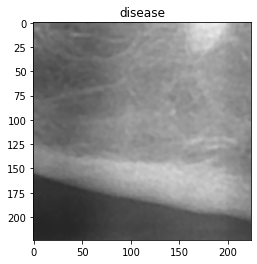

In [13]:
# resize the igmk and do nosie reduction using mean and median filter

igm_ = []
for i in img:
    i = cv2.resize(i, (224, 224))
    # i = i/255
    # i = cv2.medianBlur(i, 3)
    # i = cv2.blur(i, (3, 3))
    i = cv2.convertScaleAbs(i, alpha=1.5, beta=0)
    i = cv2.GaussianBlur(i, (3, 3), 0)
    # i = cv2.Canny(i, 15, 50)
    # i = cv2.merge((i, i, i))
    igm_.append(i)
plt.imshow(igm_[4])
plt.title(label_[4])

In [14]:
print(len(igm_), len(label_))

376 376


In [15]:
# convert the label into one hot encoding
import sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_ = label_encoder.fit_transform(label_)
print(label_)

[0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0
 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1
 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 1 1 0]


In [16]:
# normalising the igmk_ data
igmk_ = igm_
igmk_ = np.array(igmk_)
igmk_ = igmk_ / 255

In [17]:
igmk_.min(), igmk_.max()
# igmk_.shape

(0.0, 1.0)

In [18]:
print(igmk_.shape, label_.shape)

(376, 224, 224, 3) (376,)


In [19]:
# one hot encoding on label

label_ = tf.keras.utils.to_categorical(label_, num_classes=2)
print(label_)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [24]:
l = np.argmax(label_, axis=1)

In [25]:
l.shape

(376,)

In [20]:
# X_train = igmk_[:int(len(igmk_) * 0.8)]
# y_train = label_ [:int(len(igmk_) * 0.8)]
# X_val = igmk_[int(len(igmk_) * 0.8):int(len(igmk_) * 0.9)]
# y_val = label_ [int(len(igmk_) * 0.8):int(len(igmk_) * 0.9)]
# X_test = igmk_[int(len(igmk_) * 0.9):]
# y_test = label_ [int(len(igmk_) * 0.9):]


X_train = igmk_[:int(len(igmk_) * 0.9)]
y_train = label_ [:int(len(igmk_) * 0.9)]

X_test = igmk_[int(len(igmk_) * 0.9):]
y_test = label_ [int(len(igmk_) * 0.9):]

In [21]:
# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((338, 224, 224, 3), (338, 2), (38, 224, 224, 3), (38, 2))

In [22]:
print(X_train.shape, y_train.shape)

(338, 224, 224, 3) (338, 2)


In [26]:
y_train_ = np.argmax(y_train, axis=1)

In [27]:
# using class weight to balance the data
from sklearn.utils import class_weight

# y_train_ = np.argmax(y_train, axis=1)

clas_weight = class_weight.compute_class_weight('balanced', classes = np.unique(y_train_), y= y_train_)

class_weights = dict((k, round(v, 5)) for k, v in enumerate(clas_weight))
class_weights


{0: 0.74449, 1: 1.52252}

In [28]:
# build the model

#hyperparameters
num_classes = 2
input_shape = (224, 224, 3)
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 50
image_size = 224 
patch_size = 32  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [1024, 1024]  # Size of the dense layers of the final classifier

In [29]:
#mlp head

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [30]:
# patching the image

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 32 X 32
Patches per image: 49
Elements per patch: 3072


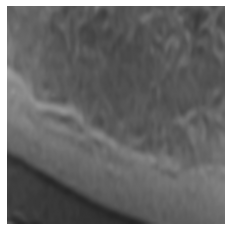

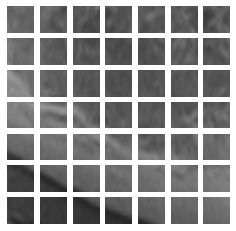

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
# image = data_augmentation(X_train[0])
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

In [32]:
# patch encoding
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [33]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(factor=0.02),
    layers.CenterCrop(height=32, width=32),
    layers.RandomContrast(factor=0.1),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    layers.RandomCrop(height=32, width=32),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
], name="data_augmentation")



# data_augmentation = keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(factor=0.02),
# ], name="data_augmentation")


In [34]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [35]:
# model summary

model = create_vit_classifier()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 32, 32, 3)   0           ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 3072)   0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 49, 64)       199808      ['patches_1[0][0]']          

In [36]:
# # model compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate, decay=weight_decay),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy(name="acc"),
                       tfa.metrics.F1Score(num_classes=2, name='f1')])

# model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate, decay=weight_decay),
#               loss=keras.losses.CategoricalCrossentropy(from_logits=True),
#               metrics=[keras.metrics.CategoricalAccuracy(name="acc"),
#                        tfa.metrics.F1Score(num_classes=2, name='f1')])



In [37]:
# early stopping and training the model

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)

# model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, class_weight= clas_weight) #callbacks=[callback], verbose=1)

# early stopping and training the model

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data= (X_test, y_test), class_weight = class_weights, verbose= 1)#, callbacks=[callback], verbose=1)

Epoch 1/50
11/11 [==============================] - 26s 546ms/step - loss: 1.7144 - acc: 0.5030 - f1: 0.4805 - val_loss: 1.9288 - val_acc: 0.3947 - val_f1: 0.2830
Epoch 2/50
11/11 [==============================] - 5s 407ms/step - loss: 1.6314 - acc: 0.4645 - f1: 0.4643 - val_loss: 1.0882 - val_acc: 0.6053 - val_f1: 0.3770
Epoch 3/50
11/11 [==============================] - 5s 398ms/step - loss: 1.1442 - acc: 0.5015 - f1: 0.4646 - val_loss: 0.7199 - val_acc: 0.6053 - val_f1: 0.3770
Epoch 4/50
11/11 [==============================] - 5s 412ms/step - loss: 0.8281 - acc: 0.5237 - f1: 0.5152 - val_loss: 0.6921 - val_acc: 0.5000 - val_f1: 0.4337
Epoch 5/50
11/11 [==============================] - 4s 372ms/step - loss: 0.7735 - acc: 0.5370 - f1: 0.5030 - val_loss: 0.7083 - val_acc: 0.5395 - val_f1: 0.4154
Epoch 6/50
11/11 [==============================] - 4s 369ms/step - loss: 0.7837 - acc: 0.5251 - f1: 0.5133 - val_loss: 0.6815 - val_acc: 0.6053 - val_f1: 0.3770
Epoch 7/50
11/11 [=========

In [38]:
# print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape)

(338, 224, 224, 3) (338, 2) (38, 224, 224, 3) (38, 2)


In [39]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 30ms/step - loss: 0.7024 - acc: 0.5132 - f1: 0.4737


[0.7024423480033875,
 0.5131579041481018,
 array([0.47368422, 0.47368422], dtype=float32)]

In [40]:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 31ms/step


In [41]:
print(y_pred)

[[-0.18646312  0.17723316]
 [ 0.6255981  -0.5923888 ]
 [-0.10957736  0.103992  ]
 [-0.18202266  0.17332268]
 [ 0.04909916 -0.04753589]
 [-0.18293804  0.17431858]
 [-0.12553953  0.11918253]
 [ 0.5475996  -0.51893604]
 [ 0.7429711  -0.70300084]
 [-0.18424639  0.17643344]
 [-0.18529727  0.17800808]
 [-0.19764361  0.19058123]
 [ 0.06436622 -0.06214913]
 [-0.08176368  0.0775295 ]
 [ 0.2900418  -0.27640483]
 [ 0.47153237 -0.4473858 ]
 [ 0.18909793 -0.18082535]
 [-0.18320876  0.17495865]
 [ 0.139174   -0.13349521]
 [-0.18963198  0.1802988 ]
 [-0.18716767  0.18024054]
 [ 0.5021734  -0.4762413 ]
 [-0.18339048  0.17505929]
 [ 0.4768624  -0.45237148]
 [-0.08647308  0.08200974]
 [-0.15132922  0.14367694]
 [-0.19062887  0.18126804]
 [-0.17770414  0.16878515]
 [-0.18316059  0.17451519]
 [-0.11710243  0.11114348]
 [ 0.32539418 -0.30967543]
 [ 0.12704217 -0.12197696]
 [-0.11567314  0.10982642]
 [ 0.5426346  -0.51429033]
 [-0.18577658  0.17718062]
 [-0.18385121  0.1613484 ]
 [-0.19160599  0.18281469]
 

In [42]:
# convert the predicted output into label
y_pred_ = label_encoder.inverse_transform(y_pred.argmax(axis=1))
print(y_pred_)

['normal' 'disease' 'normal' 'normal' 'disease' 'normal' 'normal'
 'disease' 'disease' 'normal' 'normal' 'normal' 'disease' 'normal'
 'disease' 'disease' 'disease' 'normal' 'disease' 'normal' 'normal'
 'disease' 'normal' 'disease' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'disease' 'disease' 'normal' 'disease' 'normal' 'normal'
 'normal' 'disease']


In [43]:
# convet the test output into label
# convert the hot encoded output into label

y_test1 = np.argmax(y_test, axis=1)
print(y_test1)

[0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1
 0]


In [44]:
ypred1 = np.argmax(y_pred, axis=1)
ypred1

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [46]:
y_test2 = label_encoder.inverse_transform(y_test1)
print(y_test2)

['disease' 'disease' 'normal' 'disease' 'normal' 'disease' 'normal'
 'disease' 'normal' 'normal' 'normal' 'disease' 'disease' 'disease'
 'normal' 'disease' 'normal' 'disease' 'disease' 'normal' 'disease'
 'disease' 'disease' 'disease' 'disease' 'disease' 'disease' 'disease'
 'disease' 'normal' 'normal' 'disease' 'normal' 'normal' 'disease'
 'normal' 'normal' 'disease']


In [54]:
# make the confusion matrix
import tensorflow as tf

c = tf.math.confusion_matrix(y_test1, ypred1)
c

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9, 14],
       [ 6,  9]])>

<AxesSubplot:>

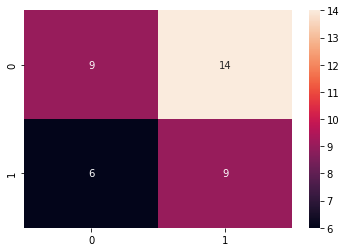

In [55]:
import seaborn as sns

sns.heatmap(c, annot=True, fmt='g')

In [57]:
len(y_test), len(ypred1)

(38, 38)

In [61]:
# count the number of disease and normal in y_test
print(np.bincount(y_test1))

c_disease = 0
c_normal = 0
for i in range(len(y_test1)):
    if y_test1[i] == 0:
        c_disease += 1
    else:
        c_normal += 1
        
        
print(f"disease count: {c_disease}, normal count: {c_normal}")

[23 15]
disease count: 23, normal count: 15
